In [1]:
!pip install GoogleNews
!pip install --upgrade GoogleNews
!pip install dateparser
# NLTK VADER for sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.downloader.download('vader_lexicon')

Requirement already up-to-date: GoogleNews in /usr/local/lib/python3.6/dist-packages (1.4.0)
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


True

In [2]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from GoogleNews import GoogleNews
import re
from datetime import datetime, timedelta
import numpy as np

In [23]:
def ne(lan,inicio,pesquisa):
    googlenews = GoogleNews()
    GoogleNews(lan)
    GoogleNews(start=inicio)
    googlenews.search(pesquisa)
    googlenews.getpage(1)
    return(googlenews.result())
    googlenews.clear()

In [84]:
#Escreva aqui
Pesquisa = 'USA'
Data='06/08/2020'
Idioma='en'

In [85]:
dados=ne(Idioma,Data,Pesquisa)

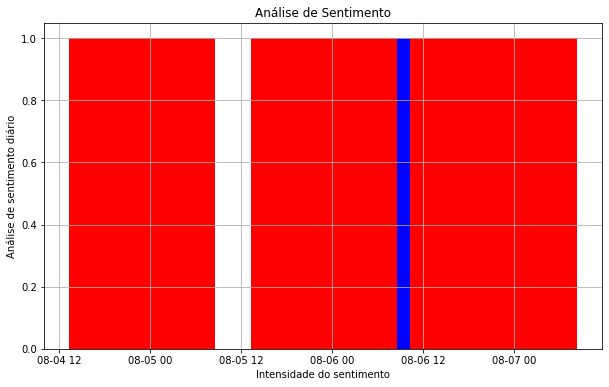

In [89]:
dados=pd.DataFrame(dados)
temp = dados['date']
tit =  dados['title']
info = dados['desc']
t=temp.tolist()

def convert_datetime(datetime_ago):

    matches = re.search(r"(\d+ weeks?,? )?(\d+ days?,? )?(\d+ hours?,? )?(\d+ mins?,? )?(\d+ secs? )?ago", datetime_ago)
    if not matches:
        return None
    date_pieces = {'week': 0, 'day': 0, 'hour': 0, 'min': 0, 'sec': 0}
    for i in range(1, len(date_pieces) + 1):
        if matches.group(i):
            value_unit = matches.group(i).rstrip(', ')
            if len(value_unit.split()) == 2:
                value, unit = value_unit.split()
                date_pieces[unit.rstrip('s')] = int(value)

    d = datetime.today() - timedelta(
        weeks=date_pieces['week'],
        days=date_pieces['day'],
        hours=date_pieces['hour'],
        minutes=date_pieces['min'],
        seconds=date_pieces['sec']
    )
    return d

time = t
temp=[]
i = 0
while i < len(time):
    temp.append(convert_datetime(time[i]))
    i = i + 1

temp=pd.DataFrame(temp)
temp[0]=pd.to_datetime(temp[0])
temp_ord = temp.sort_values(by=0)

data = pd.concat((temp_ord,tit,info), axis=1)
data.sort_values(by=0)

vader = SentimentIntensityAnalyzer()
scores = data['desc'].apply(vader.polarity_scores).tolist()
sco=pd.DataFrame(scores)
neg=sco['neg'] 
neu=sco['neu']
pos=sco['pos']
result=sco['compound']
dados = pd.concat((temp,tit,info,neg,neu,pos,result), axis=1)
dados_org=dados.sort_values(by=0)
 
dados_org.to_csv(r'Dollar_sent.csv', index = False)
god=dados_org['compound'].values>0
bad=dados_org['compound'].values<0
x=dados_org['compound']

t=dados_org[0].tolist()
plt.rcParams['figure.figsize'] = [10, 6]
plt.bar(t,god,color='blue')

plt.bar(t,bad,color='red')

plt.title('Análise de Sentimento')
plt.xlabel('Intensidade do sentimento')
plt.ylabel('Análise de sentimento diário')
plt.grid()